## Lending club case study
Lending club is one of the leading lender of loans in the country. Our objective is to scrutinise and analyse the loan application and find patterns to identify, what is the statistical possibility of defaulting the loan by the borrower.
We will use the basic principles of data analytics to conclude the results.

In [1]:
# importing the necessary libraries
import pandas as pd
pd.set_option('display.max_rows', 120, 'display.max_columns', 120)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# set low_memory to false to silence the memory warning
df = pd.read_csv('loan.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Use sweetviz to do a quick analysis on the file
# import sweetviz as sv
# report = sv.analyze(df)
# report.show_html("loan.html")

### Data Cleaning

In [5]:
# check the percentage of missing values in all columns
100*df.isnull().sum()/len(df.index)

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


In [6]:
# drop all the columns having more than 60% of missing values
df.dropna(axis=1, thresh=0.4*len(df.index), inplace=True)
print(df.shape)
round(100*df.isnull().sum()/len(df.index),2)

(39717, 54)


id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc            

We have reatained 54 columns.

We can drop the desc and title column, as we have a similar column(purpose) with short and crisp text

In [7]:
df.drop(['title','desc'], axis=1, inplace=True)
df.shape

(39717, 52)

In [8]:
# percentage distribution of loan_status
100*df['loan_status'].value_counts()/len(df.index)

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [9]:
# Get rid of the rows having status as "Current", as they will not be used in the analysis
df = df[df['loan_status'] != 'Current']

In [10]:
# check the number of unique values in each column
df.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
purpose                          14
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [11]:
# count number of columns with only 1 unique value
list(df.nunique() == 1).count(True)

11

In [12]:
# drop the columns having only 1 unique value
df = df.loc[:,df.nunique()>1]
df.shape

(38577, 41)

In [13]:
# find the maximum number of missing values in a row
max(df.isnull().sum(axis=1))

3

In [14]:
# display all the rows having 3 missing values
df[df.isnull().sum(axis=1) == 3]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
4714,997734,1222858,6100,6100,6100.00,36 months,14.27%,209.29,C,C2,NaN,NaN,MORTGAGE,23748.00,Verified,Nov-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,657xx,MO,23.95,0,May-02,0,2,0,0,NaN,4,1755.22,1755.22,989.91,471.90,0.00,293.41,2.82,Jun-12,209.29,Nov-12,0.00
11282,817195,1024992,5000,5000,5000.00,36 months,21.36%,189.31,F,F4,NaN,NaN,MORTGAGE,35000.00,Not Verified,Jul-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,985xx,WA,21.91,0,Dec-07,2,2,0,0,NaN,5,6814.70,6814.70,5000.00,1814.70,0.00,0.00,0.00,Aug-14,204.01,Feb-15,0.00
14839,759372,932652,1000,1000,1000.00,36 months,13.43%,33.91,C,C3,NaN,NaN,RENT,10140.00,Verified,May-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,credit_card,923xx,CA,23.67,0,Oct-01,2,4,0,6487,94%,10,359.77,359.77,0.00,0.00,0.00,359.77,90.41,NaN,0.00,May-16,0.00
16719,727583,923109,5550,5550,5550.00,60 months,13.06%,126.46,C,C2,NaN,NaN,OWN,16572.00,Not Verified,Apr-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,179xx,PA,19.62,0,Dec-95,1,4,0,12966,83.70%,9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,May-11,0.00
24984,592219,757968,2400,2400,2400.00,36 months,14.72%,82.87,C,C5,NaN,NaN,RENT,18000.00,Verified,Oct-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,430xx,OH,1.67,0,Sep-06,0,9,0,0,NaN,10,2869.29,2869.29,2400.00,469.30,0.00,0.00,0.00,Jul-12,1214.84,Aug-12,0.00
28547,535687,692160,4000,4000,3900.00,60 months,10.75%,86.48,B,B2,NaN,NaN,RENT,13944.00,Not Verified,Jun-10,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,530xx,WI,5.94,0,Nov-90,0,5,0,2179,24.80%,7,179.66,175.17,0.00,0.00,0.00,179.66,1.71,NaN,0.00,Dec-10,0.00
28980,529224,684409,4750,4750,4750.00,36 months,14.72%,164.01,C,C5,NaN,NaN,OWN,10400.00,Verified,Jun-10,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,808xx,CO,3.00,3,Dec-99,0,6,0,740,33.60%,10,213.32,213.32,0.00,0.00,0.00,213.32,2.03,NaN,0.00,Nov-10,0.00
32545,480843,611346,1000,1000,1000.00,36 months,10.25%,32.39,B,B2,NaN,NaN,RENT,10500.00,Not Verified,Feb-10,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,educational,907xx,CA,21.37,1,Jul-95,0,10,0,5430,48.90%,19,44.92,44.92,0.00,0.00,0.00,44.92,0.42,NaN,0.00,Jul-10,0.00
39476,186499,186347,1000,1000,875.00,36 months,7.12%,30.94,A,A1,NaN,< 1 year,MORTGAGE,120000.00,Not Verified,Dec-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,941xx,CA,0.65,0,Jul-97,1,7,0,2227,3.80%,37,1110.81,971.96,1000.00,110.81,0.00,0.00,0.00,Aug-10,185.80,NaN,nan


Since we have quite a lot of rows with Charged Off status, we will not remove the rows

In [16]:
# percentage of non-zero null values in columns
missing_series = round(100*df.isnull().sum()/len(df.index),2)
missing_series[missing_series > 0]

emp_title              6.19
emp_length             2.68
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.81
dtype: float64

Let us analyze each column one by one for its missing values

In [17]:
# convert to lowercase
df['emp_title'] = df['emp_title'].str.lower()
df['emp_title'].value_counts()

us army                                206
bank of america                        132
walmart                                 78
at&t                                    77
kaiser permanente                       68
                                      ... 
legion insurance                         1
nashville high school                    1
innovative information technologies      1
at&t hotel and conference center         1
abtech systems                           1
Name: emp_title, Length: 26703, dtype: int64

There are a lot of unique values, with us army having the highest frequency.
It would be better to keep the missing values as is

In [18]:
df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [19]:
print("Number of missing values in emp_length column: ", df['emp_length'].isnull().sum())
print("Number of values having both emp_title and emp_length as blank: ",len(df[df['emp_title'].isnull() & df['emp_length'].isnull()]))

Number of missing values in emp_length column:  1033
Number of values having both emp_title and emp_length as blank:  978


As, both the above numbers are very close. We can conlcude that the blank values are the persons with no employment history.

We will replace the missing values with 0 indicating that the person has no work experience

In [20]:
df['emp_length'].fillna(value='0 year', inplace=True)

# converting column names to numbers for better display while creating plots
df['emp_length'].replace({"< 1 year": "0.5", "10+ years": "10"}, inplace=True)
df['emp_length'] = df['emp_length'].apply(lambda x: float(x.split(" ")[0]))
df['emp_length'].value_counts()

10.00    8488
0.50     4508
2.00     4291
3.00     4012
4.00     3342
5.00     3194
1.00     3169
6.00     2168
7.00     1711
8.00     1435
9.00     1226
0.00     1033
Name: emp_length, dtype: int64

In [21]:
# remove the % sign from the column values
df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%','')))
df['revol_util'].describe()

count   38527.00
mean       48.70
std        28.36
min         0.00
25%        25.20
50%        49.10
75%        72.30
max        99.90
Name: revol_util, dtype: float64

In [22]:
df['revol_util'].isnull().sum()

50

Here the mean and median are almost similar.

But, we will not impute the values as we plan to create bukets of this column while plotting charts and imputing will cause an increase in the central bucket.

Hence, it is better to keep the missing values as it is

In [23]:
df['pub_rec_bankruptcies'].value_counts()

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

Majority of the values for pub_rec_bankruptcies are 0.

Hence, we will not impute or remove. We will keep the missing values as it is

In [24]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38527.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,38577.00,37880.00
mean,676378.71,842284.34,11047.03,10784.06,10222.48,322.47,4.87,68777.97,13.27,0.15,0.87,9.28,0.06,13289.49,48.70,22.05,11866.97,11271.20,9648.32,2119.24,1.37,98.04,12.77,2746.24,0.04
std,209263.90,264451.93,7348.44,7090.31,7022.72,208.64,3.52,64218.68,6.67,0.49,1.07,4.40,0.24,15866.49,28.36,11.43,8809.86,8700.85,7009.38,2389.50,7.32,698.65,150.84,4494.65,0.20
min,54734.00,70699.00,500.00,500.00,0.00,15.69,0.00,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,512033.00,661131.00,5300.00,5200.00,5000.00,165.74,2.00,40000.00,8.13,0.00,0.00,6.00,0.00,3650.00,25.20,13.00,5513.50,5019.59,4500.00,643.99,0.00,0.00,0.00,217.42,0.00
50%,656423.00,839292.00,9600.00,9550.00,8733.44,277.86,4.00,58868.00,13.37,0.00,1.00,9.00,0.00,8762.00,49.10,20.00,9674.05,9066.66,8000.00,1300.45,0.00,0.00,0.00,568.26,0.00
75%,829146.00,1037336.00,15000.00,15000.00,14000.00,425.55,9.00,82000.00,18.56,0.00,1.00,12.00,0.00,16912.00,72.30,29.00,16136.95,15329.78,13175.00,2671.98,0.00,0.00,0.00,3447.25,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,10.00,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,2.00


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


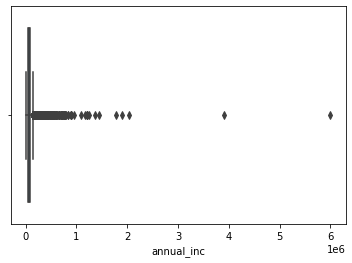

In [25]:
sns.boxplot(df['annual_inc'])
plt.show()

In [26]:
# let us check the oultiers, values greater than $ 1M
df[df['annual_inc']>1000000.00]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
7247,884755,1100269,12025,12025,12000.00,36 months,14.27%,412.57,C,C2,nycdoe,10.00,RENT,1782000.00,Not Verified,Sep-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,108xx,NY,1.31,0,Dec-87,0,9,0,49208,85.70,30,14847.44,14816.57,12025.00,2822.44,0.00,0.00,0.00,Sep-14,842.91,May-16,0.00
10621,830027,1039166,15775,15775,15750.00,60 months,12.99%,358.85,C,C1,stryker instruments,2.00,MORTGAGE,1250000.00,Verified,Jul-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,490xx,MI,21.81,0,May-97,0,10,0,48258,83.20,28,18301.35,18272.56,12799.70,5481.50,0.00,20.15,3.63,Oct-15,358.85,May-16,0.00
21412,643368,823374,10000,10000,9500.00,36 months,6.54%,306.68,A,A4,convent of the sacred heart,10.00,OWN,1200000.00,Verified,Jan-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,068xx,CT,1.46,0,Jun-94,0,6,0,75706,49.10,13,11008.57,10458.14,10000.00,1008.57,0.00,0.00,0.00,Oct-13,222.14,Mar-16,0.00
23551,611872,784585,1500,1500,1500.00,36 months,6.17%,45.75,A,A3,montgomery isd,5.00,MORTGAGE,1900000.00,Source Verified,Nov-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,773xx,TX,0.57,0,Jun-81,2,17,0,17396,59.60,36,1562.35,1562.35,1500.00,62.35,0.00,0.00,0.00,Aug-11,1197.34,Feb-12,0.00
24166,603818,774761,25000,25000,24493.46,60 months,15.20%,597.38,D,D4,avis budget group,10.00,RENT,1200000.00,Source Verified,Nov-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,700xx,LA,0.41,0,Aug-98,1,4,0,11168,69.80,12,33125.07,32082.19,25000.00,8125.07,0.00,0.00,0.00,Jul-13,14624.78,Jul-13,0.00
25762,572697,736657,12000,12000,12000.00,36 months,7.51%,373.33,A,A4,telsource corp,1.00,MORTGAGE,1200000.00,Not Verified,Sep-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,070xx,NJ,9.17,0,Oct-89,2,12,0,26684,51.90,26,13440.09,13440.09,12000.00,1440.09,0.00,0.00,0.00,Oct-13,407.64,May-16,0.00
27564,551367,710553,5600,5600,5600.00,60 months,13.61%,129.18,C,C2,dept of army,10.00,MORTGAGE,1176000.00,Source Verified,Jul-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,206xx,MD,1.22,1,Mar-97,0,6,0,11753,73.50,25,7750.18,7750.18,5600.00,2150.18,0.00,0.00,0.00,Aug-15,137.79,Aug-15,0.00
28906,528009,682915,4500,4500,4500.00,60 months,7.88%,90.99,A,A5,st. john lutheran church,8.00,MORTGAGE,1080000.00,Source Verified,Jun-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,217xx,MD,0.57,0,Nov-83,0,7,0,46337,1.90,20,5262.06,5262.06,4500.00,762.06,0.00,0.00,0.00,May-13,2269.27,May-13,0.00
29639,519954,672152,25000,15500,11430.00,60 months,10.62%,334.08,B,B3,lea regional hospital/pecos valley,3.00,MORTGAGE,3900000.00,Not Verified,Jun-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,882xx,NM,0.20,0,Sep-99,3,12,0,3270,10.20,32,20044.62,13756.41,15500.00,4544.62,0.00,0.00,0.00,Jun-15,353.14,Jun-15,0.00
30107,513542,663575,5000,5000,5000.00,36 months,12.73%,167.84,C,C1,post office,10.00,MORTGAGE,6000000.00,Source Verified,May-10,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,939xx,CA,0.01,0,Jan-01,1,2,0,1434,37.70,10,5514.49,5514.49,5000.00,514.49,0.00,0.00,0.00,Apr-11,3845.25,May-11,0.00


These are natural outliers, so we will not remove them

In [27]:
# check the number of unique values in the id fields
df['id'].nunique(), df['member_id'].nunique()

(38577, 38577)

All of the values in id and member_id are unique, hence they will not give us any useful information, we can remove the 2 columns

In [28]:
# drop the columns that are not needed
df.drop(['id','member_id','url'], axis=1, inplace=True)

In [29]:
# removing % sign in int_rate column
df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x).replace('%','')))
df['int_rate'].describe()

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64

### Data Cleaning conclusion
We have done basic cleaning of the data

For some columns, it would be better to keep the other missing values as is and proceed with our analysis

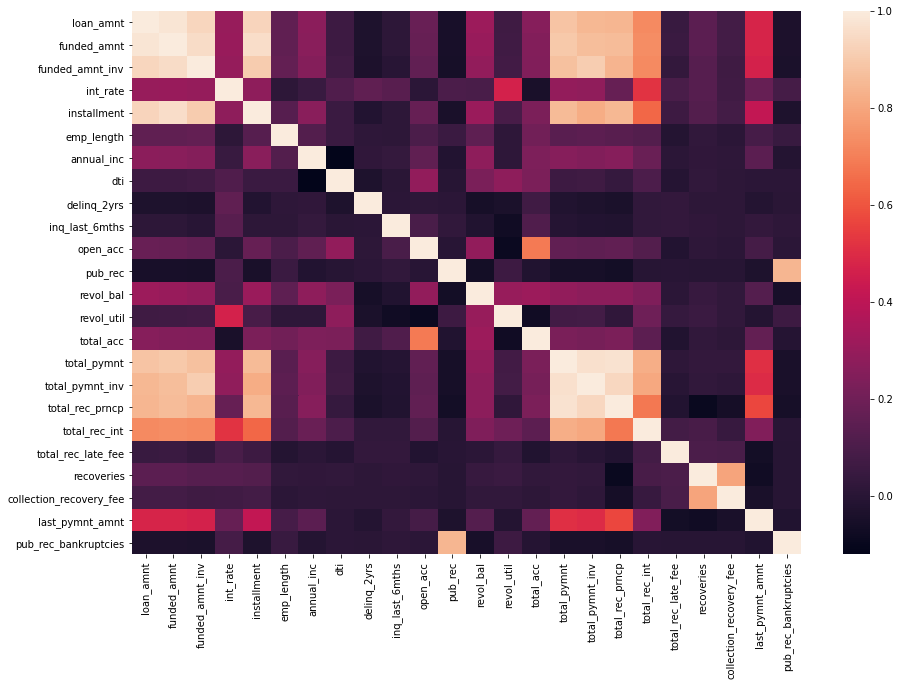

In [30]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr())
plt.show()

### Correlation analysis
Based on this heatmap, we observe that the loan_amnt, funded_amnt, funded_amnt_inv, installment are highly correlated.

Similarly total_payment, total_payment_inv, total_rec_prncp, total_rec_int are highly correlated.

Also, these 2 groups have a good amount of correlation between them as well.

### Univariate and Segmented Univariate Analysis

In this case study, we will use the concepts of EDA to understand how consumer attributes and loan attributes influence the tendency of default.

We will only focus on the variables which will be avaiable to us while approving/rejecting loans. Other customer attributes like outstanding amount, recoveries, etc, which are available after the loan is approved will not be helpful in understing the driving factors (or driver variables) behind loan default

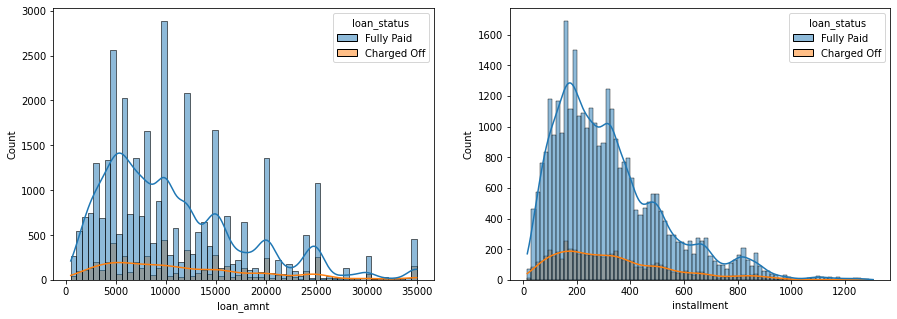

In [31]:
# Analyze the distribution of loan_amount and installment
plt.figure(figsize=[15,5])
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='loan_amnt', hue='loan_status', kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='installment', hue='loan_status', kde=True)
plt.show()

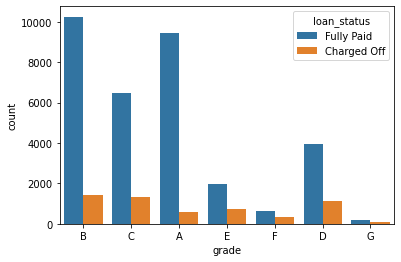

In [32]:
sns.countplot(data=df, x='grade', hue='loan_status')
plt.show()

Most of the loans are having grade as A,B,C

Writing the template code that will be used in a lot of places

In [33]:
# create a bar plot of a particular column showing percentage of loan defaulted
def bar_plot_default_percentage(colName, figSizeVal, textDist):
    df_pd = pd.pivot_table(data=df, values='loan_amnt', index=colName, columns='loan_status', aggfunc=np.size).apply(lambda x: x/x.sum(), axis=1)
    df_pd = df_pd.reset_index()
    plt.figure(figsize=figSizeVal)
    sns.barplot(data=df_pd, x=colName, y='Charged Off')
    for i, v in enumerate(df_pd['Charged Off']):
        v = 0 if np.isnan(v) else v
        plt.text(i-textDist, v, str(round(v*100,2)))
    plt.ylabel('Default rate (%)')
    plt.show()

In [34]:
# function for analyzing 2 types of variables together
def bivariate_bar_plot_default_percentage(col1, col2, figSizeVal, textDist):
    df_pd = pd.pivot_table(data=df, values='loan_amnt', index=[col1, col2], columns='loan_status', aggfunc=np.size).apply(lambda x: x/x.sum(), axis=1)
    df_pd = df_pd.reset_index()
    plt.figure(figsize=figSizeVal)
    sns.barplot(data=df_pd, x=col1, y='Charged Off', hue=col2)

    for i, v in enumerate(df_pd['Charged Off']):
        v = 0 if np.isnan(v) else v
        if i%2 == 1:
            i=i-textDist
        plt.text(i/2-textDist, v, str(round(v*100,2)))
    plt.ylabel('Default rate (%)')
    plt.show()

In [35]:
# function for analyzing 2 types of variables together
def bivariate_bar_plot_without_percentage(col1, col2, figSizeVal):
    df_pd = pd.pivot_table(data=df, values='loan_amnt', index=[col1, col2], columns='loan_status', aggfunc=np.size).apply(lambda x: x/x.sum(), axis=1)
    df_pd = df_pd.reset_index()
    plt.figure(figsize=figSizeVal)
    sns.barplot(data=df_pd, x=col1, y='Charged Off', hue=col2)
    plt.ylabel('Default rate (%)')
    plt.show()

In [36]:
# create a stacked bar plot of a particular column showing percentage of loan for all status
def stacked_bar_plot_default_percentage(colName, figSizeVal):
    df_pd = pd.pivot_table(data=df, values='loan_amnt', index=colName, columns='loan_status', aggfunc=np.size).apply(lambda x: x/x.sum(), axis=1)
    df_pd.plot(kind='bar', stacked=True, figsize=figSizeVal)
    plt.show()

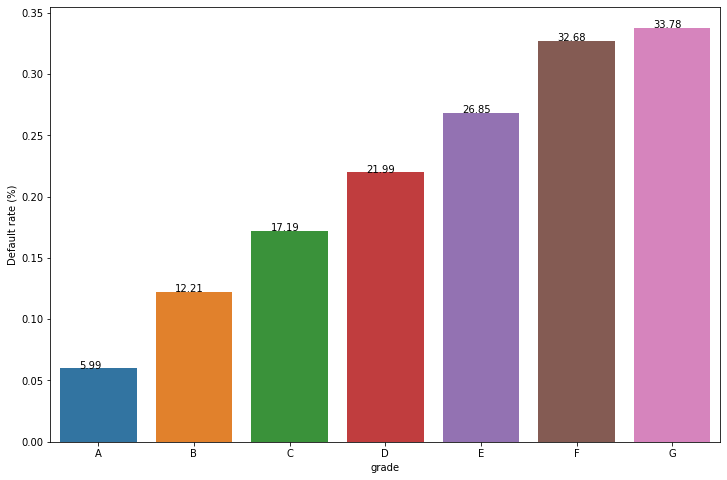

In [37]:
bar_plot_default_percentage('grade', [12,8], 0.2)

We observe that the percentage of default rate increases as the Grade increases.

This is a factor that LC should definitely keep in mind while approving the loans

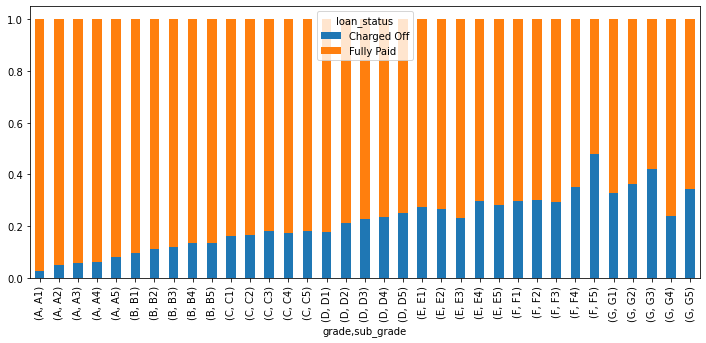

In [38]:
# stacked bar chart for grade and sub_grade
df_pd = pd.pivot_table(data=df, values='loan_amnt', index=['grade','sub_grade'], columns='loan_status', aggfunc=np.size).apply(lambda x: x/x.sum(), axis=1)
df_pd.plot(kind='bar', stacked=True, figsize=[12,5])
plt.show()

We observe a similar trend for grade+sub_grade combination.
The chances of default increases as the grade and sub_grade increase

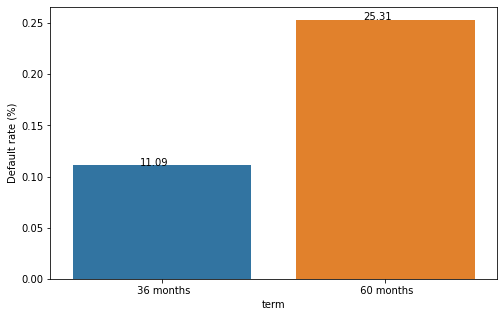

In [39]:
bar_plot_default_percentage('term', [8,5], 0.1)

Notice that is for the term of 36 months, 11% of the loans got defaulted, However, for the term of 60 months, 25% of the loans were defaulted.
So we can clearly see that the chances of a person defaulting on 5 year duration is high

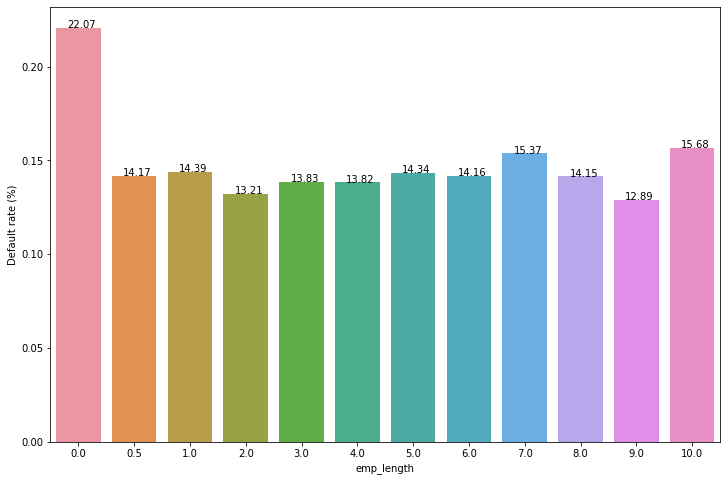

In [40]:
bar_plot_default_percentage('emp_length', [12,8], 0.2)

There is no significant pattern in the percent of defaulted loans wrt emp_length.

But an interesting observation: People with no employment experience have a high likelyhood of defaulting

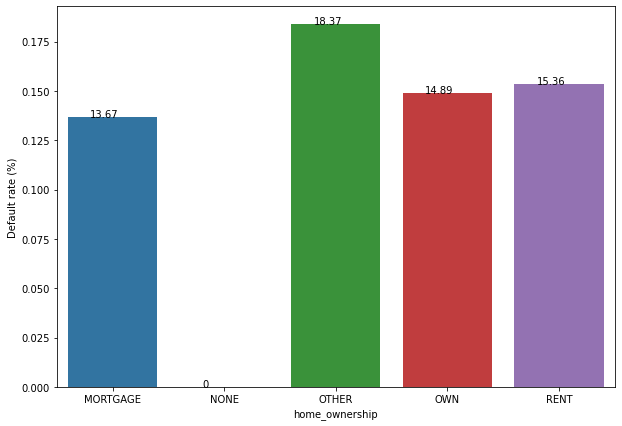

In [41]:
bar_plot_default_percentage('home_ownership', [10,7], 0.2)

There is no significant difference in the percent of defaulted loans wrt home_ownership. 
Hence, home_ownership and loan_status show no correlation.

We observe for None type_in home_ownership , all the loans have been fully paid.
But how many such values are there?


In [42]:
df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

There are not many None values, so this can be ignored

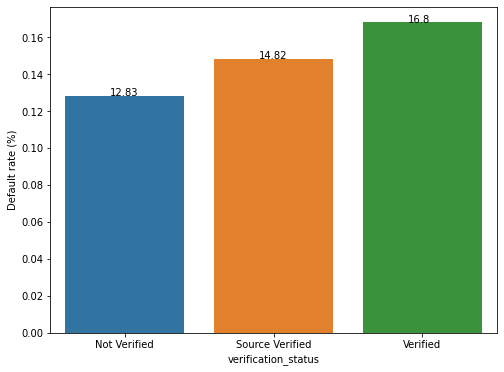

In [43]:
bar_plot_default_percentage('verification_status', [8,6], 0.1)

There is no significant difference in the percent of defaulted loans wrt verification_status. Hence, verification_status and loan_status show no correlation

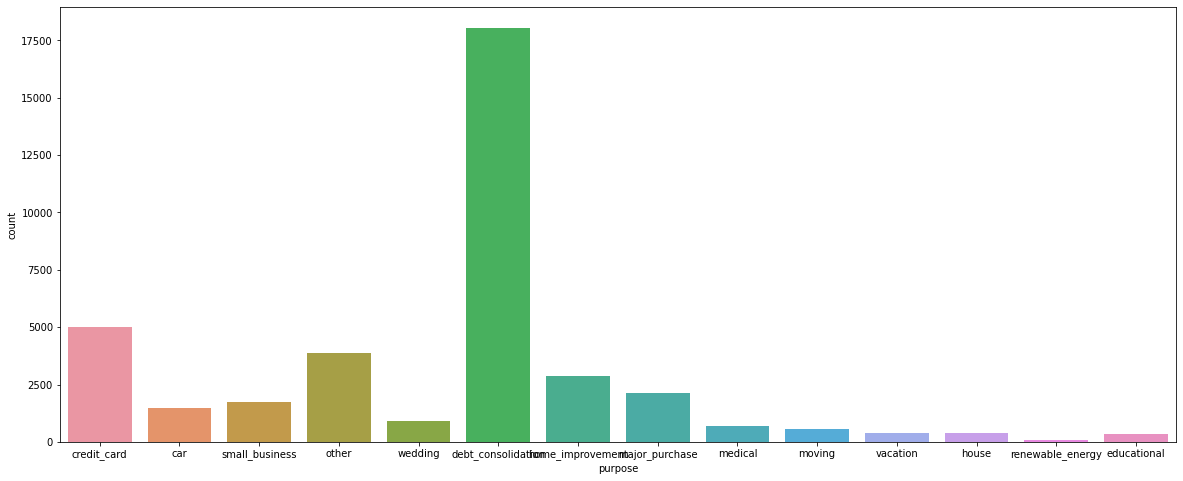

In [44]:
# count plot for number of loans for different purpose
plt.figure(figsize=[20,8])
sns.countplot(data=df, x='purpose')
plt.show()

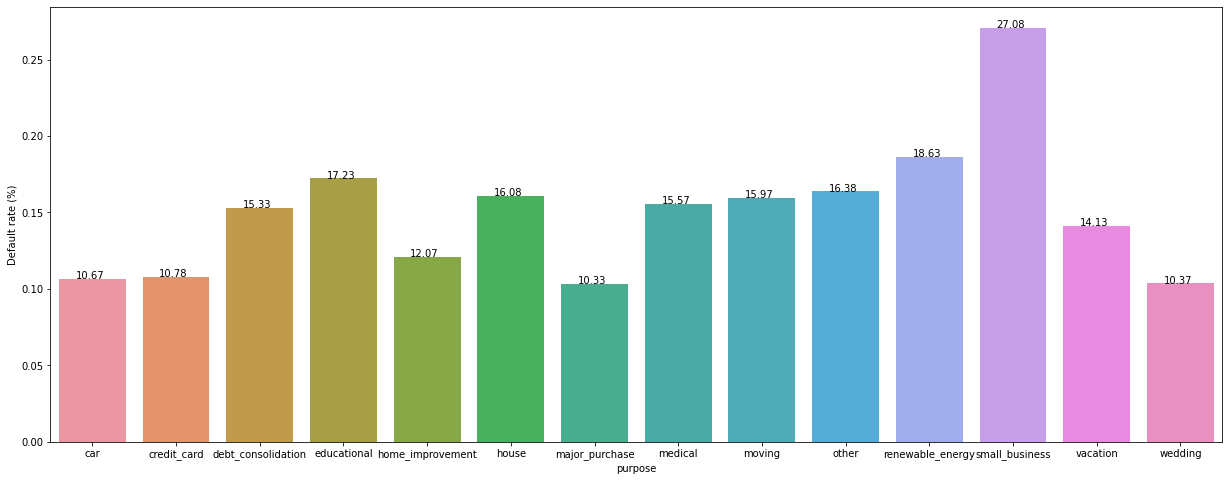

In [45]:
bar_plot_default_percentage('purpose', [21,8], 0.2)

From the above 2 plots, we observe that large number of loans are taking with the purpose of debt_consolidation.
Amongst all the purposes, small_business have the highest default rate.

We can conclude that giving loan to people who seek investement in their small_business is a very risky 

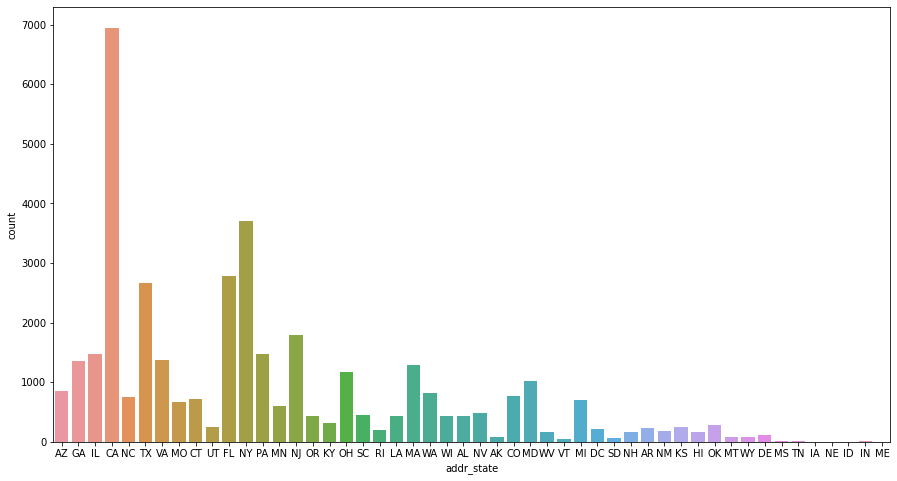

In [46]:
# count plot for number of loans for different purpose
plt.figure(figsize=[15,8])
sns.countplot(data=df, x='addr_state')
plt.show()

California(CA) has issues the highest number of loans

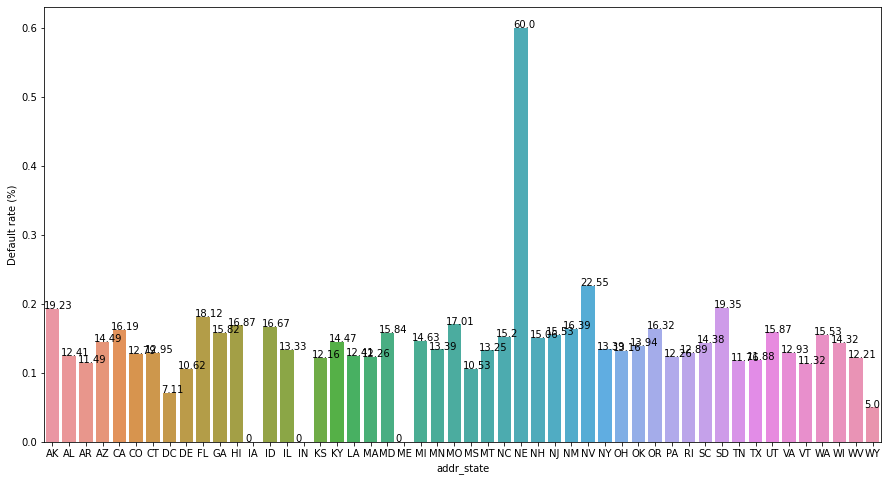

In [47]:
bar_plot_default_percentage('addr_state', [15,8], 0.5)

From this plot, we see that the state Nebraska(NE) has a very high defualt rate. But how many loan entries are present for that state?

In [48]:
# print the top 5 states having high % of default loans, with total loan count alongside
df_st_pd = pd.pivot_table(data=df, values='loan_amnt', index='addr_state', columns='loan_status', aggfunc=np.size)
df_st_pd['total_count'] = df_st_pd['Charged Off'].add(df_st_pd['Fully Paid'], fill_value=0)
df_st_pd['default_perc'] = df_st_pd['Charged Off']/df_st_pd['total_count']
df_st_pd.sort_values(by='default_perc', ascending=False).head()

loan_status,Charged Off,Fully Paid,total_count,default_perc
addr_state,,,,
NE,3.00,2.00,5.00,0.60
NV,108.00,371.00,479.00,0.23
SD,12.00,50.00,62.00,0.19
AK,15.00,63.00,78.00,0.19
FL,504.00,2277.00,2781.00,0.18


As we do not have good amount of data for Nebraska(NE), we cannot really conclude anything.

However, Nevada(NV) has 23% default rate (relatively high)

In [49]:
# find the zip codes having high % of default loans
df_zip_pd = pd.pivot_table(data=df, values='loan_amnt', index='zip_code', columns='loan_status', aggfunc=np.size)
df_zip_pd['total_count'] = df_zip_pd['Charged Off'].add(df_zip_pd['Fully Paid'], fill_value=0)
df_zip_pd['default_perc'] = df_zip_pd['Charged Off']/df_zip_pd['total_count']

# show zip_codes having atleast 40 entries
df_zip_pd[df_zip_pd['total_count'] > 40].sort_values(by='default_perc', ascending=False).head(10)

loan_status,Charged Off,Fully Paid,total_count,default_perc
zip_code,,,,
912xx,16.00,31.00,47.00,0.34
935xx,33.00,67.00,100.00,0.33
986xx,15.00,40.00,55.00,0.27
206xx,16.00,44.00,60.00,0.27
082xx,13.00,36.00,49.00,0.27
891xx,64.00,178.00,242.00,0.26
283xx,13.00,37.00,50.00,0.26
937xx,12.00,36.00,48.00,0.25
890xx,32.00,97.00,129.00,0.25


The top 2 entries belong to the state of California, and they have a high default rate.
So, LC should watch out for the residents of Glendale(912xx) & Mojave(935xx) while giving out loans

In [50]:
df['delinq_2yrs'].value_counts()

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64

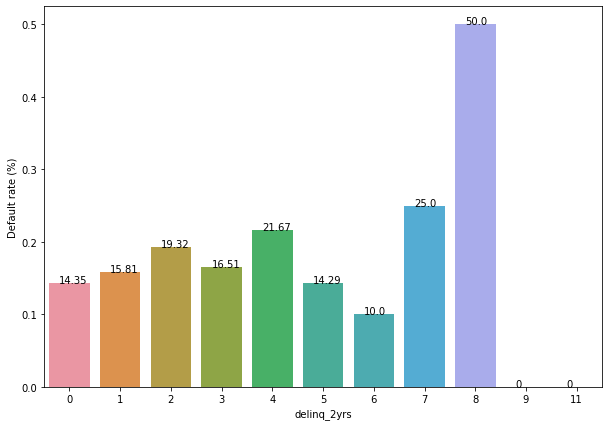

In [51]:
bar_plot_default_percentage('delinq_2yrs', [10,7], 0.2)

There is not much of a pattern from the delinq_2yrs column

In [52]:
df['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

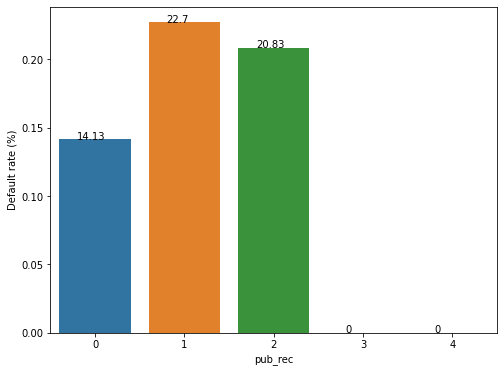

In [53]:
bar_plot_default_percentage('pub_rec', [8,6], 0.2)

We could see from the above plot that individuals having more than 1 pub_rec have high chances of defaulting

In [54]:
df['pub_rec_bankruptcies'].value_counts()

0.00    36238
1.00     1637
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

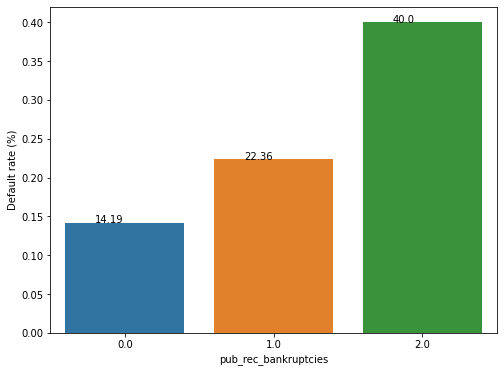

In [55]:
bar_plot_default_percentage('pub_rec_bankruptcies', [8,6], 0.2)

We see a strong pattern wrt pub_rec_bankruptcies.

As the number of publicly recorded bankruptices increases, the likelyhood of defaulting increases drastically.
People with >= 1 pub_rec_bankrupties have changes of defaulting

In [56]:
df['open_acc'].value_counts()

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
33       3
32       3
36       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64

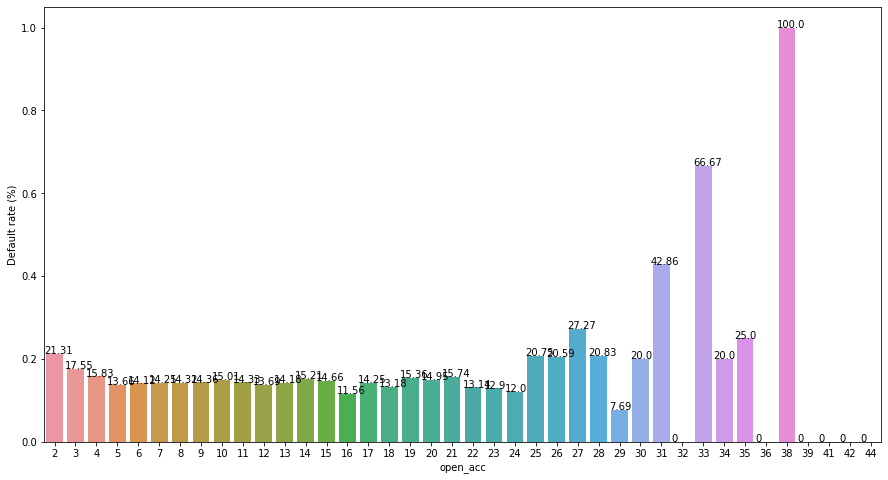

In [57]:
bar_plot_default_percentage('open_acc', [15,8], 0.5)

Nothing much to conlcude here

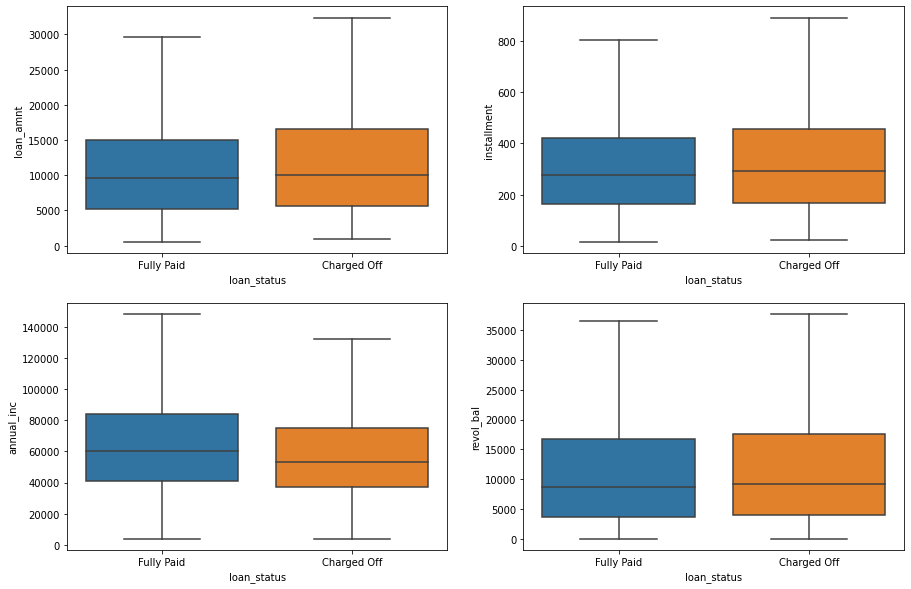

In [58]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
sns.boxplot(data=df, x='loan_status', y='loan_amnt', showfliers=False)
plt.subplot(2,2,2)
sns.boxplot(data=df, x='loan_status', y='installment', showfliers=False)
plt.subplot(2,2,3)
sns.boxplot(data=df, x='loan_status', y='annual_inc', showfliers=False)
plt.subplot(2,2,4)
sns.boxplot(data=df, x='loan_status', y='revol_bal', showfliers=False)
plt.show()

Nothing much to conlcude from the above boxplots

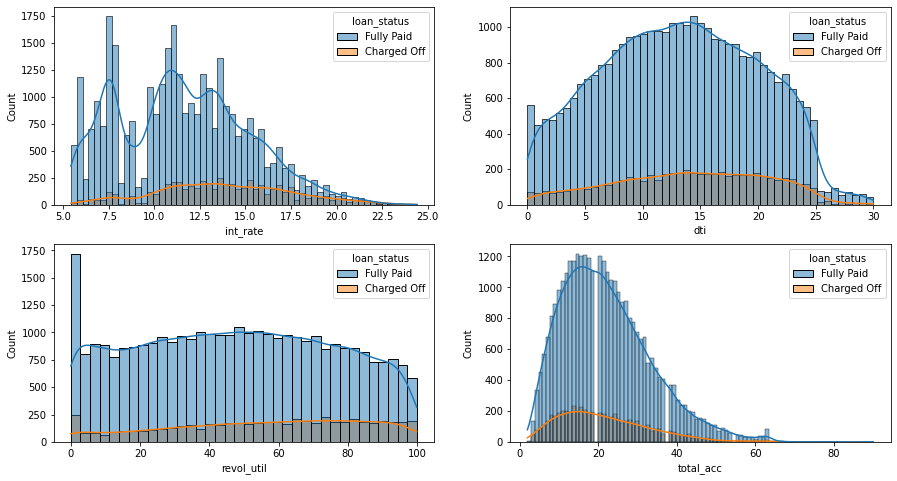

In [59]:
# Analyze the distribution of loan_amount and installment
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
sns.histplot(data=df, x='int_rate', hue='loan_status', kde=True)
plt.subplot(2,2,2)
sns.histplot(data=df, x='dti', hue='loan_status', kde=True)
plt.subplot(2,2,3)
sns.histplot(data=df, x='revol_util', hue='loan_status', kde=True)
plt.subplot(2,2,4)
sns.histplot(data=df, x='total_acc', hue='loan_status', kde=True)
plt.show()

We will come back to these columns in the later section of derived columns

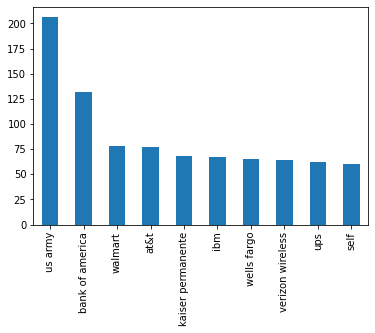

In [60]:
# plot the counts of top 10 employee titles
df['emp_title'].value_counts()[:10].plot.bar()
plt.show()

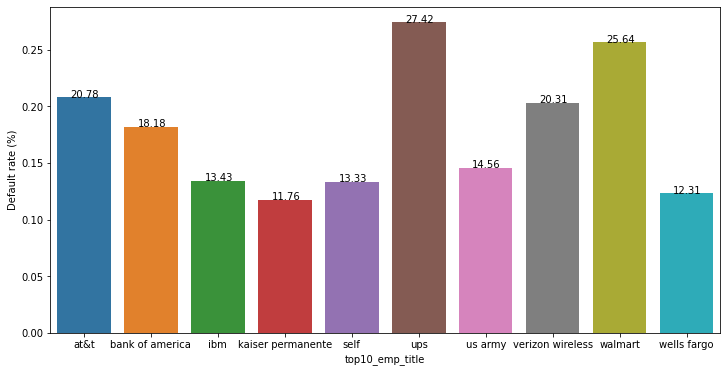

In [61]:
# plot the default percentage of these top10 titles
top10_emp_title = list(df['emp_title'].value_counts()[:10].index)
df['top10_emp_title'] = df[df['emp_title'].isin(top10_emp_title)]['emp_title']
bar_plot_default_percentage('top10_emp_title', [12,6], 0.2)
plt.show()

People working in UPS and Walmart have high default rate

In [62]:
df['inq_last_6mths'].value_counts()

0    18709
1    10660
2     5654
3     2983
4      316
5      144
6       63
7       34
8       14
Name: inq_last_6mths, dtype: int64

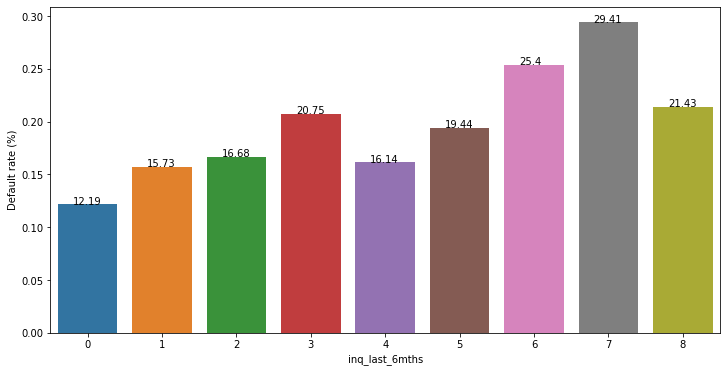

In [63]:
bar_plot_default_percentage('inq_last_6mths', [12,6], 0.2)

Individuals with >= 5 inquires in the last 6 months have a high default rate.

If this data is available to LC at the time of giving loans, then it can be considered

## Derived columns

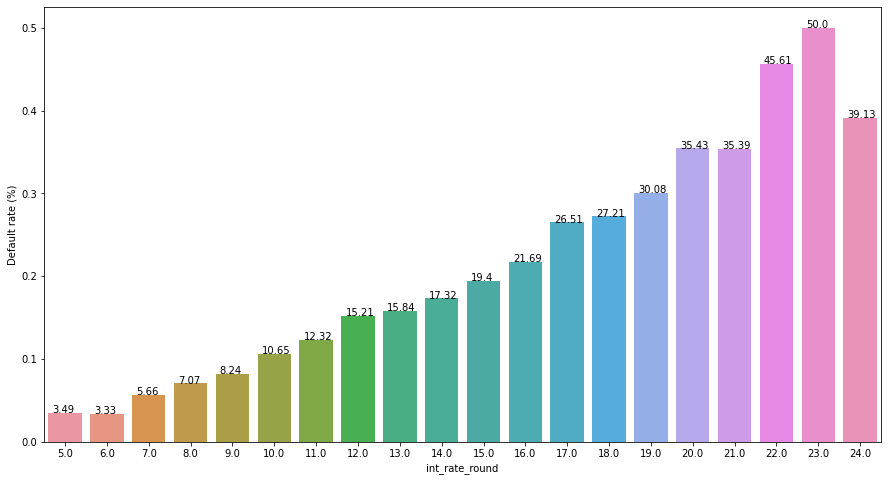

In [64]:
# round the int_rate to the nearest integer
df['int_rate_round'] = round(df['int_rate'])
bar_plot_default_percentage('int_rate_round', [15,8], 0.3)

We have a strong pattern here.

Higher the interest rate, higher the chances of defaulting

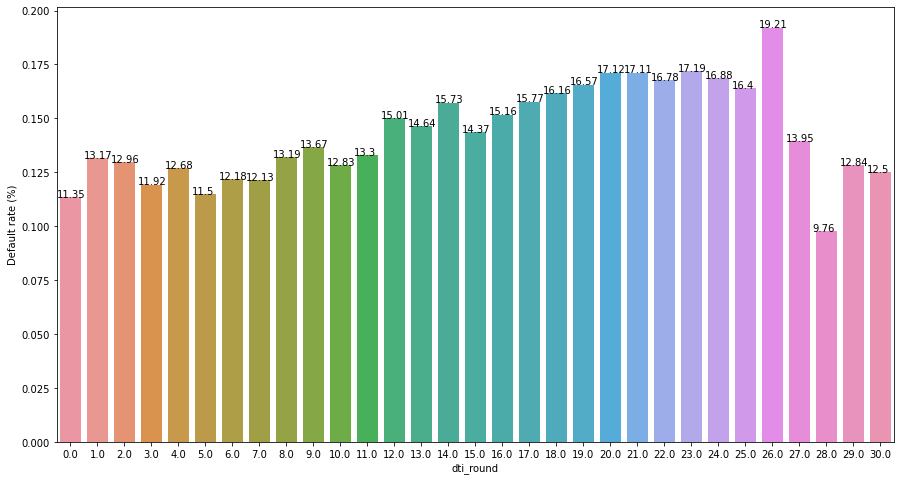

In [65]:
# round dti to the nearest integer
df['dti_round'] = round(df['dti'])
bar_plot_default_percentage('dti_round', [15,8], 0.5)

Risk slightly increases with increase in DTI

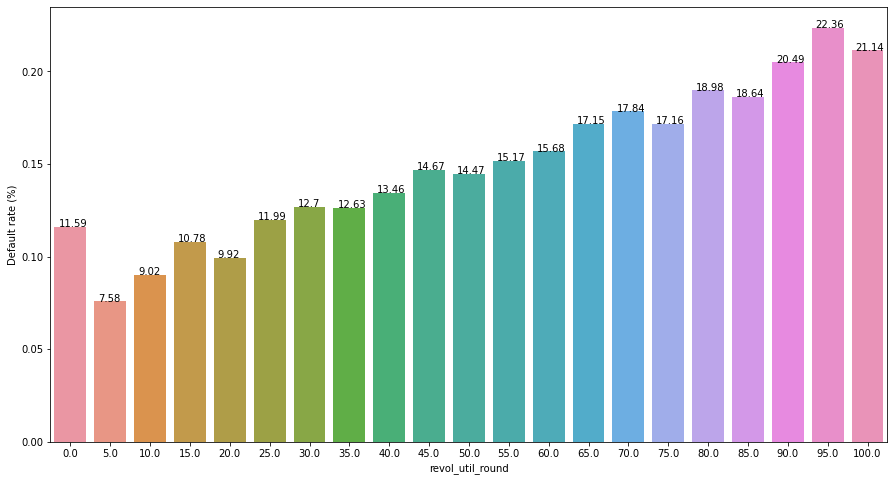

In [66]:
# round revol_util and split it into buckets with a gap of 5%
df['revol_util_round'] = df['revol_util'].apply(lambda x: np.nan if np.isnan(x) else round(x) - round(x)%5)
bar_plot_default_percentage('revol_util_round', [15,8], 0.3)

Again we have a strong pattern here.

People utilizing maximum of their credit are the ones with high likelyhood of defaulting

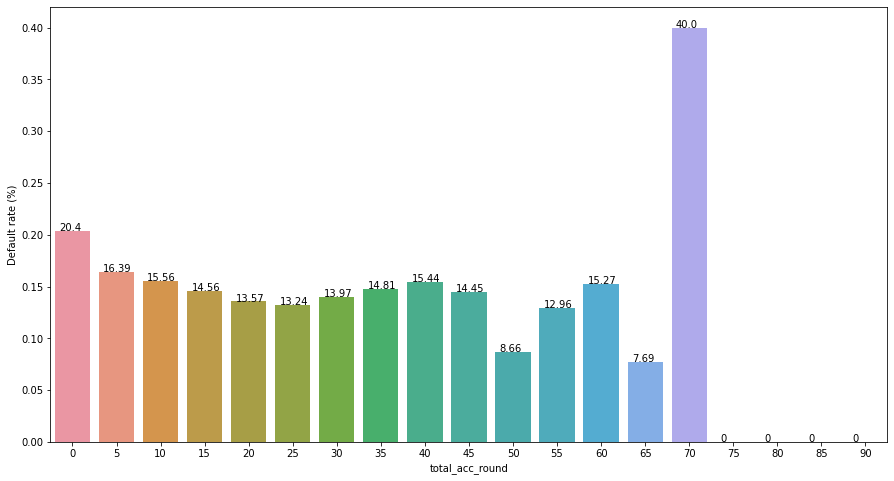

In [67]:
# round total_acc and split it into buckets with a gap of 5%
df['total_acc_round'] = df['total_acc'].apply(lambda x: x - x%5)
bar_plot_default_percentage('total_acc_round', [15,8], 0.3)

Nothing to conclude here

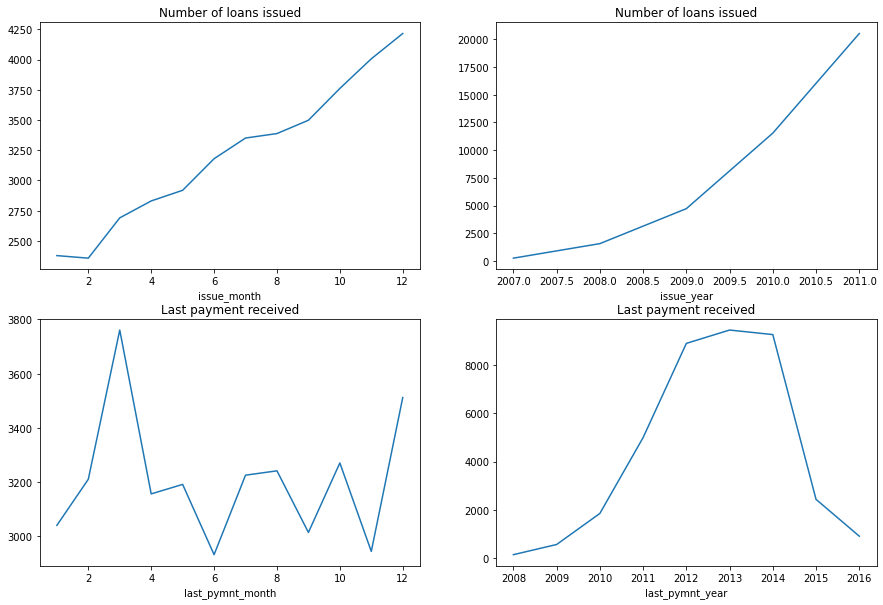

In [68]:
# extract month and year from the date columns
df['issue_month'] = pd.to_datetime(df['issue_d'], format='%b-%y').dt.month
df['issue_year'] = pd.to_datetime(df['issue_d'], format='%b-%y').dt.year

df['last_pymnt_month'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y').dt.month
df['last_pymnt_year'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y').dt.year

plt.figure(figsize=[15,10])
ax=plt.subplot(2,2,1)
ax.set_title("Number of loans issued")
df.groupby('issue_month')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(2,2,2)
ax.set_title("Number of loans issued")
df.groupby('issue_year')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(2,2,3)
ax.set_title("Last payment received")
df.groupby('last_pymnt_month')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(2,2,4)
ax.set_title("Last payment received")
df.groupby('last_pymnt_year')['loan_amnt'].count().plot(kind='line')
plt.show()

### Observations
1. From the first plot, we clearly see that most of the loans are issued at the end of the year
2. From the 2nd(issue_year) plot, we see a peak in year 2011 and on the 4th plot(last_payment_year), we see a peak in the year 2014. Which means that the loans given in 2011 were paid after exactly 3 years(2014) which is one of the loan duration(term) LC has to offer
3. The 3rd plot (last_paymnt_month) has a spike in the month of May, which is not very helpful. Let us analyze the last_payment column in detail for both fully paid and defaulted loans

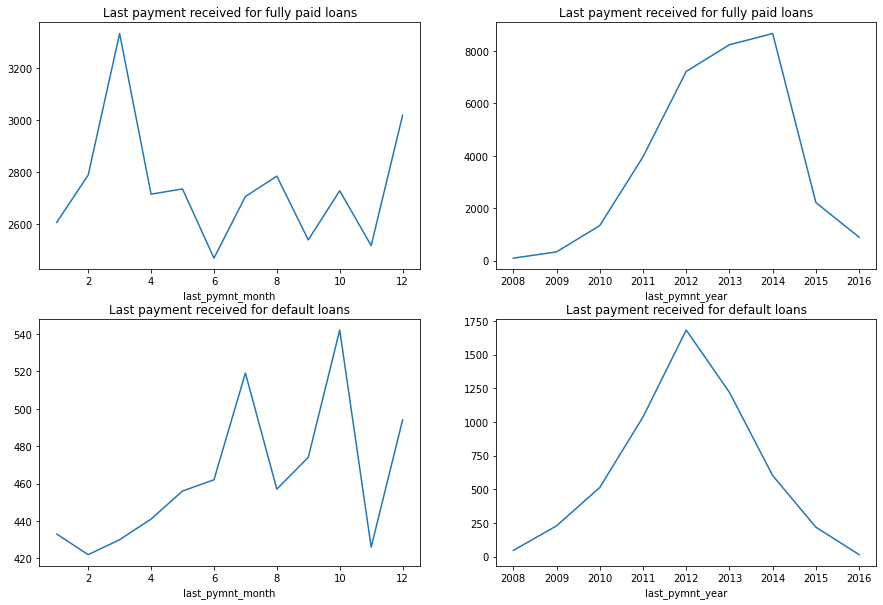

In [69]:
plt.figure(figsize=[15,10])
ax=plt.subplot(2,2,1)
ax.set_title("Last payment received for fully paid loans")
df[df['loan_status']=='Fully Paid'].groupby('last_pymnt_month')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(2,2,2)
ax.set_title("Last payment received for fully paid loans")
df[df['loan_status']=='Fully Paid'].groupby('last_pymnt_year')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(2,2,3)
ax.set_title("Last payment received for default loans")
df[df['loan_status']=='Charged Off'].groupby('last_pymnt_month')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(2,2,4)
ax.set_title("Last payment received for default loans")
df[df['loan_status']=='Charged Off'].groupby('last_pymnt_year')['loan_amnt'].count().plot(kind='line')
plt.show()

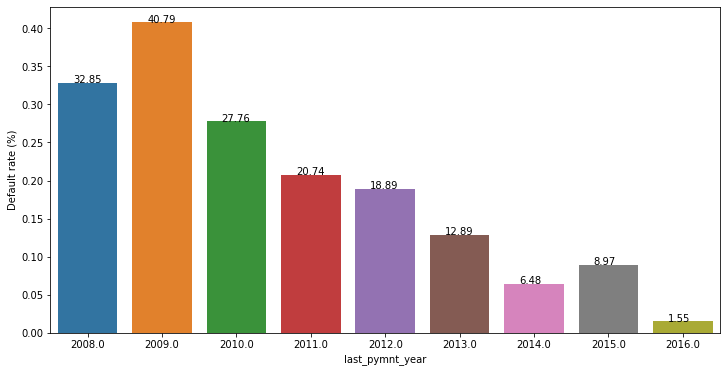

In [70]:
bar_plot_default_percentage('last_pymnt_year', [12,6], 0.2)

### Observations
1. From the first plot(last_paymnt_month -> Fully paid) we see that most of the loans are paid off in the initial 2 months, because the peak in loan issued was in year-end. 
2. The behaviour of the 2nd plot(last_paymnt_year -> Fully paid) is similar to the original plot. Again concluding that most of the loans are fully paid after 3 years duration.
3. The 4th plot(last_paymnt_year -> Charged off) has a peak in the year 2012. Indicating that most people stopped the loan payment after 2012. Something must have happend in the year 2012. We need to research on it. Maybe a domain expert can comment here
4. From the default rate plot, we see a very high percent of users stopped paying installments for their loans in 2008 and 2009. This must be related to the 2008 economic crisis in USA where many users defaulted on their loans

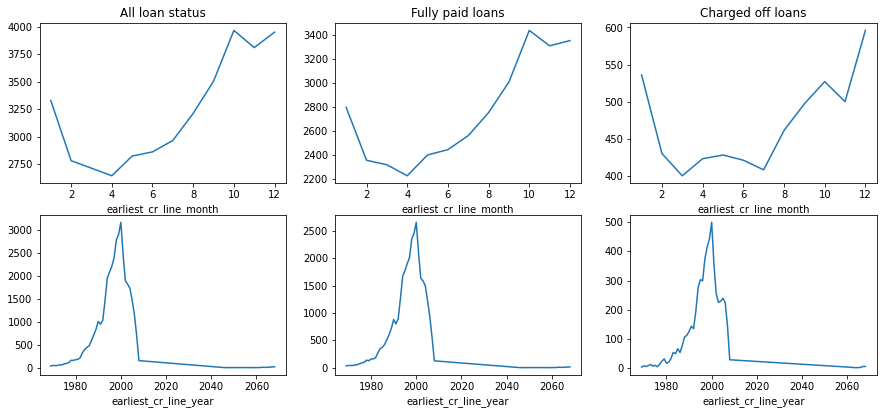

In [71]:
# extract month and year from the date columns
df['earliest_cr_line_month'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.month
df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y').dt.year

plt.figure(figsize=[15,10])
ax=plt.subplot(3,3,1)
ax.set_title("All loan status")
df.groupby('earliest_cr_line_month')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(3,3,2)
ax.set_title("Fully paid loans")
df[df['loan_status']=='Fully Paid'].groupby('earliest_cr_line_month')['loan_amnt'].count().plot(kind='line')

ax=plt.subplot(3,3,3)
ax.set_title("Charged off loans")
df[df['loan_status']=='Charged Off'].groupby('earliest_cr_line_month')['loan_amnt'].count().plot(kind='line')

plt.subplot(3,3,4)
df.groupby('earliest_cr_line_year')['loan_amnt'].count().plot(kind='line')

plt.subplot(3,3,5)
df[df['loan_status']=='Fully Paid'].groupby('earliest_cr_line_year')['loan_amnt'].count().plot(kind='line')

plt.subplot(3,3,6)
df[df['loan_status']=='Charged Off'].groupby('earliest_cr_line_year')['loan_amnt'].count().plot(kind='line')
plt.show()

The behaviour of earliest_cr_line is same for all loan types.
However, we do see a spike in the year 2000.

Again this is something where we need a domain expert's help

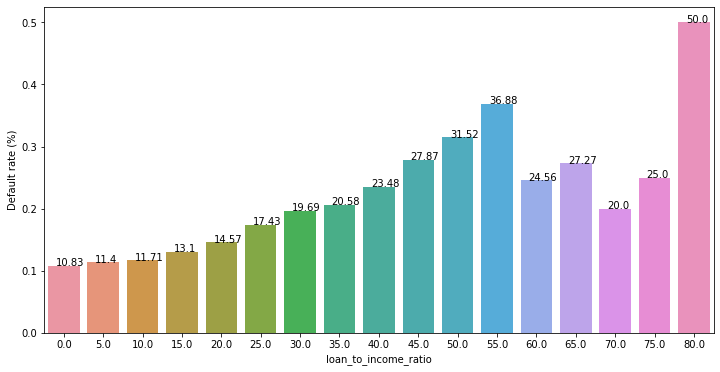

In [72]:
# create a derived column of loan-to-income-ratio
df['loan_to_income_ratio'] = round(100*df['loan_amnt']/df['annual_inc'])
df['loan_to_income_ratio'] = df['loan_to_income_ratio'].apply(lambda x: x-x%5)
bar_plot_default_percentage('loan_to_income_ratio', [12,6], 0.2)

We see a good pattern here.
We can observe that people with loan-to-income-ratio higher than 40% have a high default rate.

LC should be careful in giving loans to people who have a loan-to-income-ratio of 40% and above

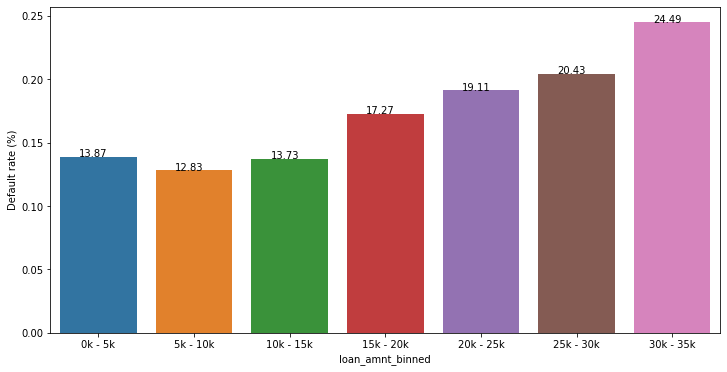

In [73]:
# creating bins with 5k in each bar
df['loan_amnt_binned'] = pd.cut(df['loan_amnt'], bins=[x for x in range(0,35001,5000)], 
                                labels=[str(x)+"k - "+str(x+5)+"k" for x in range(0,35,5)])
bar_plot_default_percentage('loan_amnt_binned', [12,6], 0.2)

We can see higher default rates for loans with large amount

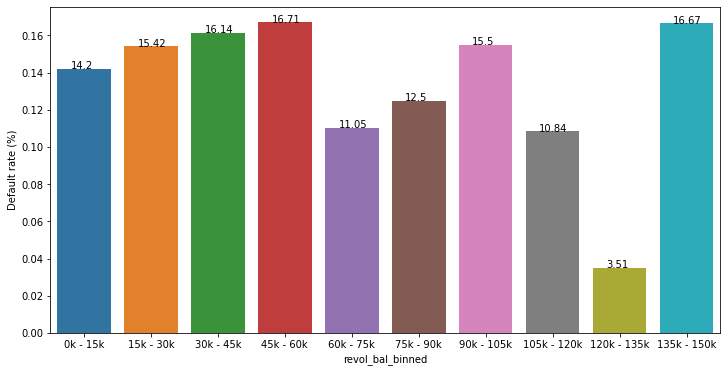

In [74]:
# creating bins with 15k in each bar
df['revol_bal_binned'] = pd.cut(df['revol_bal'], bins=[x for x in range(0,150001,15000)], 
                                labels=[str(x)+"k - "+str(x+15)+"k" for x in range(0,150,15)])
bar_plot_default_percentage('revol_bal_binned', [12,6], 0.2)

In [75]:
df['annual_inc'].describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

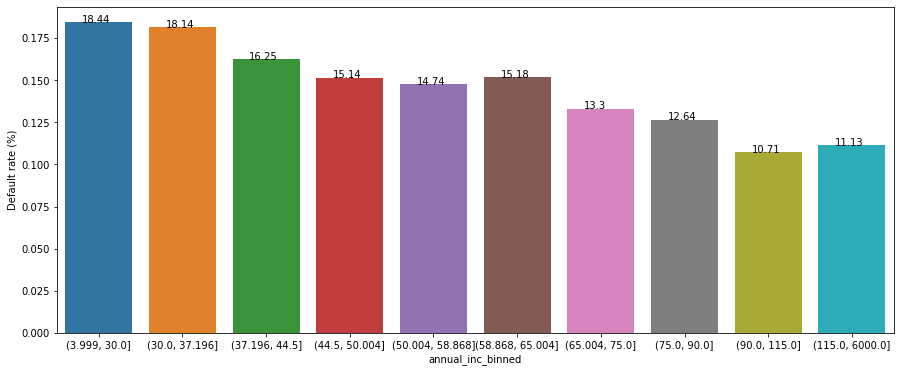

In [76]:
# as the annual_inc has a high SD and has outliers in million dollars, we will use qcut to create the bins
# dividing by 1000, so all values in the plot will be in 'k' units
df['annual_inc_binned'] = pd.qcut(df['annual_inc']/1000, 10)
bar_plot_default_percentage('annual_inc_binned', [15,6], 0.2)

We can see that people with low annual income have a high default percentage.
LC should be little cautious in giving loans to people with annual Income below 37.5k

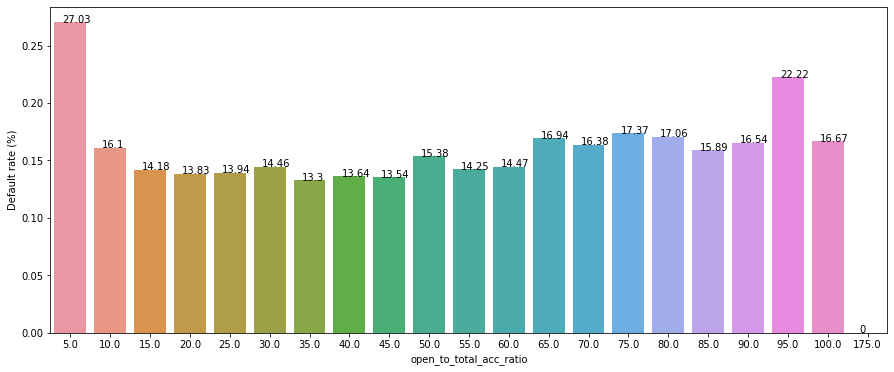

In [77]:
# create a derived column of open_to_total_ratio
df['open_to_total_acc_ratio'] = round(100*df['open_acc']/df['total_acc'])
df['open_to_total_acc_ratio'] = df['open_to_total_acc_ratio'].apply(lambda x: x-x%5)
bar_plot_default_percentage('open_to_total_acc_ratio', [15,6], 0.2)

People with open_to_total_acc_ratio less than 5% have a high default rate

## Bivariate Analysis

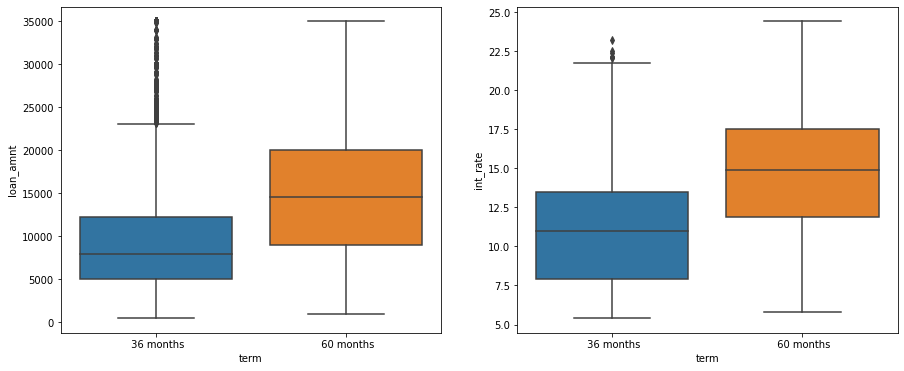

In [78]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.boxplot(data=df, x='term', y='loan_amnt')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='term', y='int_rate')
plt.show()

Observation: 5 year loans generally tend to be of a higher amount and higher interest rate than 3 year loans

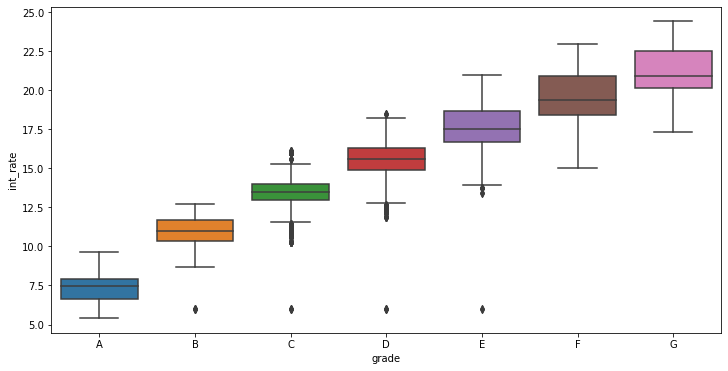

In [79]:
plt.figure(figsize=[12,6])
sns.boxplot(data=df, x='grade', y='int_rate', order=['A','B','C','D','E','F','G'])
plt.show()

The above plot justifies the grading and interest rate criteria set by LC.
High grades have high interest rates

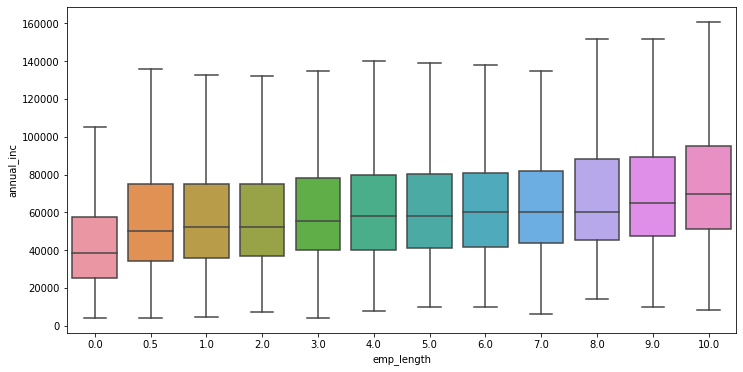

In [80]:
plt.figure(figsize=[12,6])
sns.boxplot(data=df, x='emp_length', y='annual_inc', showfliers=False)
plt.show()

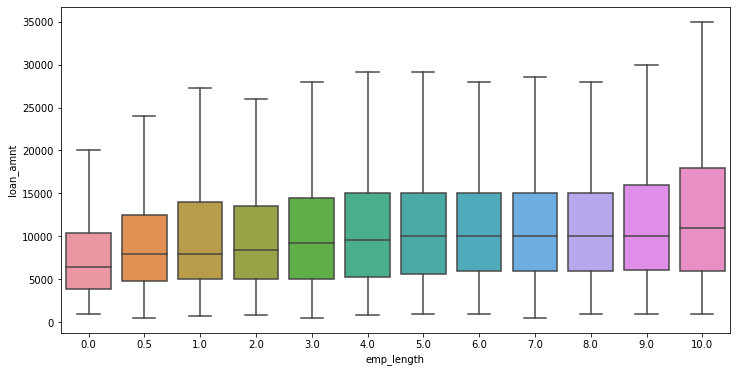

In [81]:
plt.figure(figsize=[12,6])
sns.boxplot(data=df, x='emp_length', y='loan_amnt', showfliers=False)

plt.show()

Median of annual income increases with increase in employee experience. Which is a expected behaviour.

Same is for loan_amount

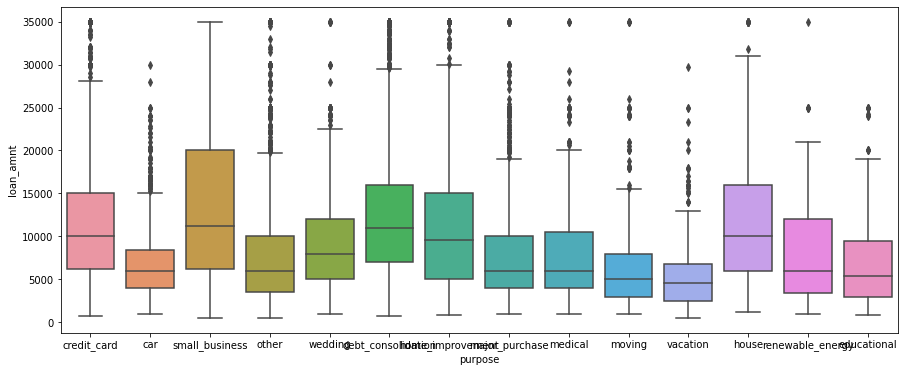

In [82]:
plt.figure(figsize=[15,6])
sns.boxplot(data=df, x='purpose', y='loan_amnt')
plt.show()

Small_business have a high IQR. Meaning loan amounts are quite distributed

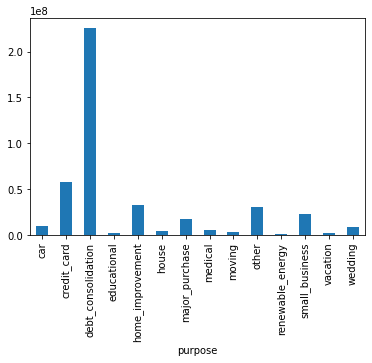

In [83]:
df.groupby('purpose')['loan_amnt'].sum().plot.bar()
plt.show()

Total amount of loans given under debt_consolidation is quite high

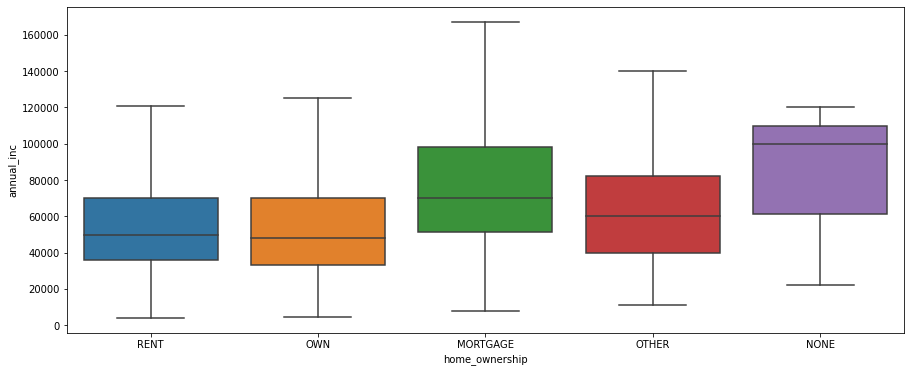

In [84]:
plt.figure(figsize=[15,6])
sns.boxplot(data=df, x='home_ownership', y='annual_inc', showfliers=False)
plt.show()

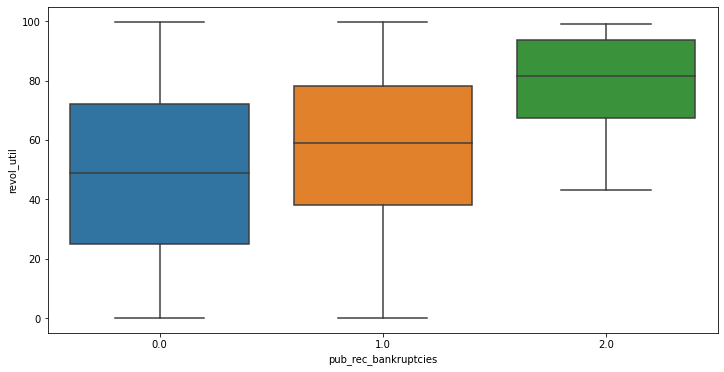

In [85]:
plt.figure(figsize=[12,6])
sns.boxplot(data=df, x='pub_rec_bankruptcies', y='revol_util')
plt.show()

We see that people having more recorded bankruptcies, tend to use majority of their credit available

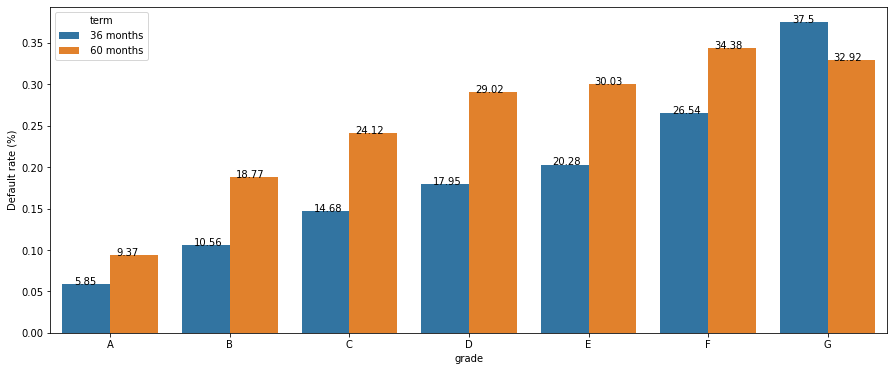

In [86]:
bivariate_bar_plot_default_percentage('grade', 'term', [15,6], 0.3)

Here, we notice that for grade G 3 year loans have a high default rate

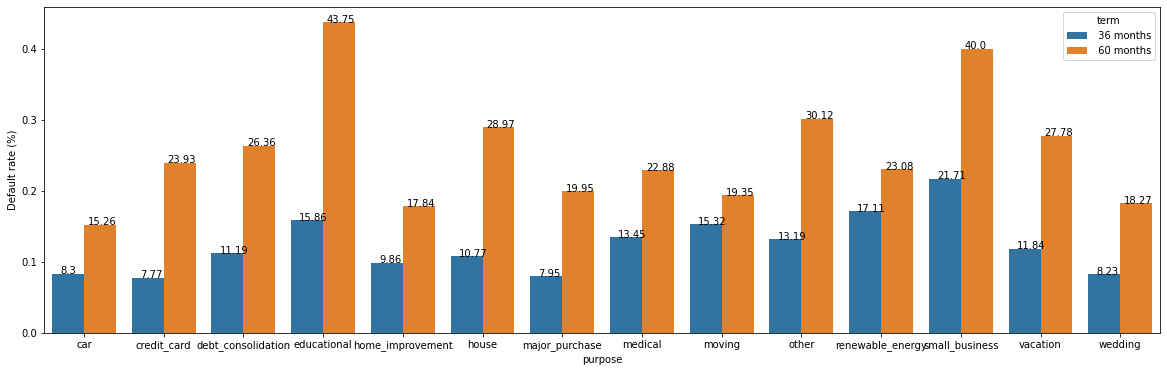

In [87]:
bivariate_bar_plot_default_percentage('purpose', 'term', [20,6], 0.3)

We found 2 very high values.

LC should either have a high interest rate or stop approving 5 year loans for educational and small_business purpose, as they have very high default rate

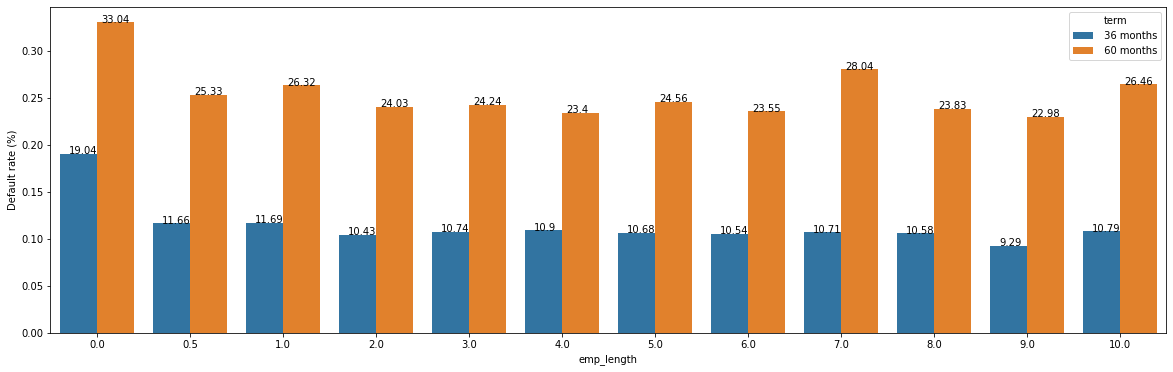

In [88]:
bivariate_bar_plot_default_percentage('emp_length', 'term', [20,6], 0.3)

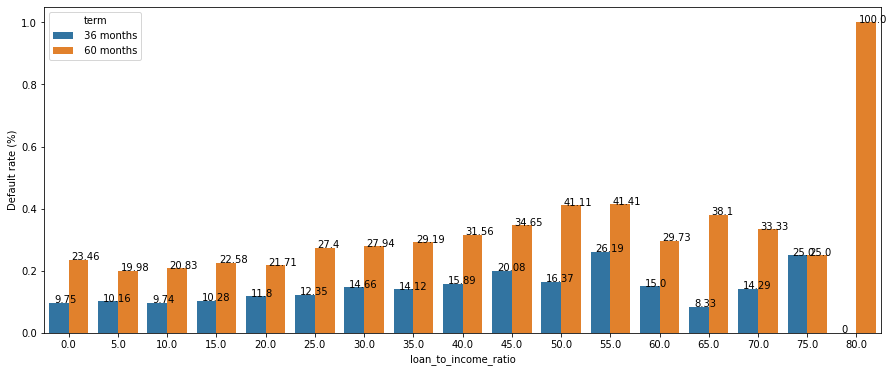

In [89]:
bivariate_bar_plot_default_percentage('loan_to_income_ratio', 'term', [15,6], 0.3)

People asking for a 5 year loan with a loan_to_income ration of 50% and above, have a high default rate

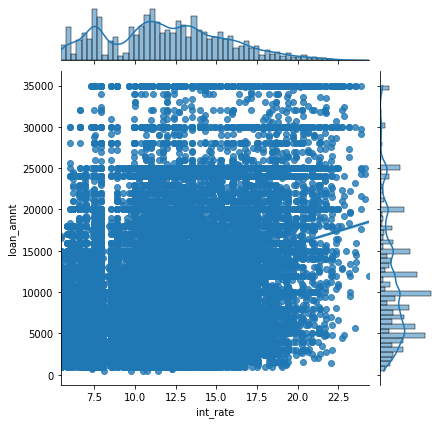

In [90]:
sns.jointplot(data=df, x='int_rate', y='loan_amnt', kind='reg')
plt.show()

Loan_amnt and int_rate have a linear relationship with low but decent positive correlation

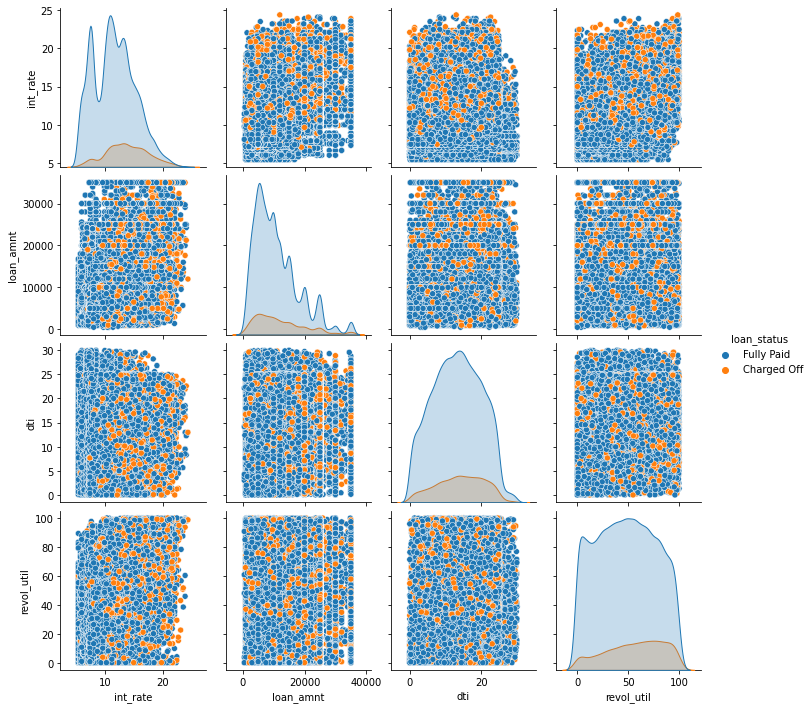

In [91]:
sns.pairplot(df[['int_rate','loan_amnt','dti','revol_util','loan_status']], hue='loan_status')
plt.show()

Nothing interesting found from this pair plot, apart from what we already know

# Conclusions

So, after detailed analysis we have reached to some conclusions and understanding of the data presented to data, based on that we have some recommendations that LC can use while accepting or rejecting Loans. 
- We can see that people with low annual income have a high default percentage. LC should be little cautious in giving loans to people with annual Income below 37.5k. 
- We observe that the percentage of default loan increases as the Grade and Sub grade increases. This is a factor that Lending Club should keep in mind while approving the loans. 
- Notice that is for the term of 36 months, 11% of the loans got defaulted, However, for the term of 60 months, 25% of the loans were defaulted. So, we can clearly see that the chances of a person defaulting on 5 years duration is high. - Amongst all the purposes, small businesses have the highest default rate . We can conclude that giving loan to people who seek investment in their small business is a very risky agreement. 
- If the borrower has more Public Bankruptcies or derogatory records, we may need to think over it before approving the loan. 
- We can observe that people with loan-to-income-ratio higher than 40% have a high default rate.
- If we add both term and loan to income ratio, we can find people asking for a 5 years loan with a loan to income ration of 50% and above, have a high default rate. Also, LC should either have a high interest rate or stop approving 5 years loans for educational and small business purpose, as they have very high default rate